In [656]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder, StandardScaler

import seaborn as sn #visual representation

from sklearn.preprocessing import StandardScaler, MinMaxScaler ## standrard scalig 
from sklearn.compose import ColumnTransformer

from sklearn import metrics

from sklearn.model_selection import train_test_split



In [657]:
# Import the file with pandas
df = pd.read_csv('lisbon-houses.csv.xls') 

# print the first lines
df.head(5)


,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000


In [658]:
df = df.drop(['Country', 'District','Municipality'], axis=1)
df = df.drop(['Id'], axis=1)

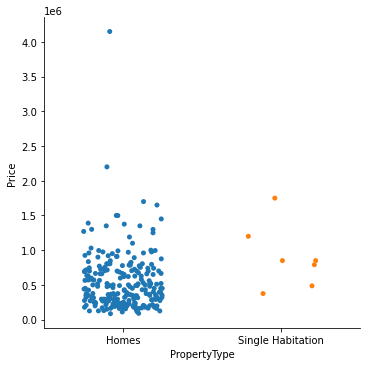

In [659]:
sn.catplot(x='PropertyType', y='Price',  data=df,jitter='0.25')

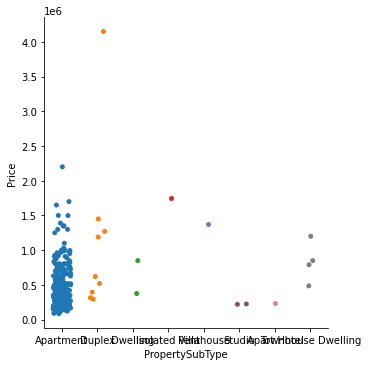

In [660]:
sn.catplot(x='PropertySubType', y='Price',  data=df,jitter='0.25')

In [661]:
df.shape

(246, 13)

In [662]:
df = df[df.PropertyType == 'Homes']
df = df.drop(['PropertyType'], axis=1)

df = df[df.PropertySubType == 'Apartment']
df = df.drop(['PropertySubType'], axis=1)

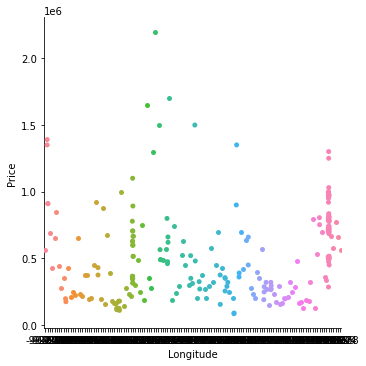

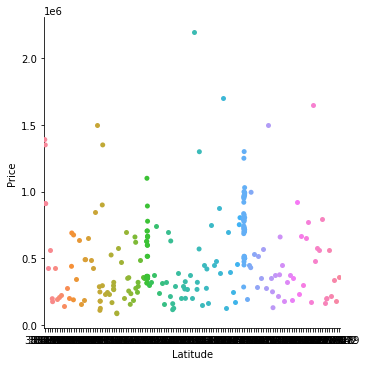

In [663]:
sn.catplot(x='Longitude', y='Price',  data=df,jitter='0.25')
sn.catplot(x='Latitude', y='Price',  data=df,jitter='0.25')

In [664]:
df = df.drop(['Longitude', 'Latitude'], axis=1)

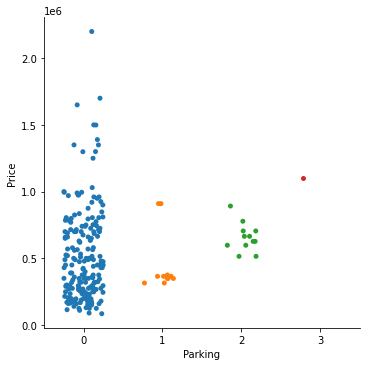

In [665]:
sn.catplot(x='Parking', y='Price',  data=df,jitter='0.25')

In [666]:
df['WithParking'] = np.where(df['Parking'] == '0', '0', '1')
df = df.drop(['Parking'], axis=1)

In [667]:
df.shape

(226, 9)

In [668]:
le=LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])
df['Parish'] = le.fit_transform(df['Parish'])


In [669]:
df.head()

,Condition,Bedrooms,Bathrooms,AreaNet,AreaGross,Parish,Price M2,Price,WithParking
0,3,3,1,76,152,16,2463,198000,1
2,3,1,1,26,52,12,4005,140000,1
3,3,5,4,185,370,22,3412,995000,1
4,3,7,1,150,300,4,3277,570000,1
5,3,3,2,95,190,7,3542,425000,1


In [670]:
X_train, X_test = train_test_split(df, test_size=0.2,random_state=1)


In [671]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [672]:
X_test_scaled.head()

,Condition,Bedrooms,Bathrooms,AreaNet,AreaGross,Parish,Price M2,Price,WithParking
40,3,4,2,109,218,13,2927,300000,1
178,0,3,2,90,180,21,5340,660000,1
98,2,3,3,161,322,14,2881,805000,1
67,2,1,1,50,100,21,5340,275000,1
212,1,2,1,60,120,12,4005,198000,1


In [673]:
y_train = X_train_scaled["Price"].values
X_train_scaled = X_train_scaled.drop("Price", axis=1).values

y_test = X_test_scaled["Price"].values
X_test_scaled = X_test_scaled.drop("Price", axis=1).values

# #MODELS

Linear Regression

In [674]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled,y_train)
y_p=model_lr.predict(X_test_scaled)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('Loss:', metrics.mean_absolute_percentage_error(y_test,y_p))

   Actual      Predicted
0  300000  375538.046209
1  660000  583177.917749
2  805000  816585.734881
3  275000  450199.129206
4  198000  302305.584101
5  275000  266586.392983
6  325000  341148.984188
7  265000  203937.777055
8  450000  364298.313261
9  970000  990728.386793
R2- SCORE: 0.790263358898014
Loss: 0.3179800367729733


Lasso

In [675]:
model_lasso = Lasso(alpha = 0.0001,tol=0.0001,fit_intercept=True, max_iter=100000)
model_lasso.fit(X_train_scaled,y_train)
y_pred = model_lasso.predict(X_test_scaled)


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2.head(15))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

     Actual     Predicted
0    300000  3.755380e+05
1    660000  5.831779e+05
2    805000  8.165857e+05
3    275000  4.501991e+05
4    198000  3.023056e+05
5    275000  2.665864e+05
6    325000  3.411490e+05
7    265000  2.039378e+05
8    450000  3.642983e+05
9    970000  9.907284e+05
10   425000  4.676495e+05
11   565000  8.179654e+05
12   630000  9.570083e+05
13  1250000  1.150288e+06
14   920000  9.468971e+05
R2- SCORE: 0.7902633589137783
MAPE: 0.3179800367171697


Ridge

In [676]:
model_ridge = Ridge(alpha = 0.0001, normalize = False,fit_intercept=False, tol = 0.001, \
              solver ='sag', random_state = 123)

model_ridge.fit(X_train_scaled, y_train)
y_pred=model_ridge.predict(X_test_scaled)


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

   Actual      Predicted
0  300000  375538.046209
1  660000  583177.917749
2  805000  816585.734881
3  275000  450199.129206
4  198000  302305.584101
5  275000  266586.392983
6  325000  341148.984188
7  265000  203937.777055
8  450000  364298.313261
9  970000  990728.386793
R2- SCORE: 0.790263358898014
MAPE: 0.3810893167682135
